# Regression Project

The time is now! It's up to you to help a poor waiter maximising his/her's tip in your first project. You will use the data collected by a waiter about each tip received over a period of a few months working in one restaurant. In total, he/she recorded 244 tips.

## Part 0 - Importing the Dataset

In [1]:
# RUN THIS CELL!

# Non-sklearn packages
import numpy as np
import pandas as pd
from seaborn import load_dataset

# Import the tips dataset
tips = load_dataset("tips")

## Part 1 - Explore the Dataset

In this part you should explore the dataset to understand it better. Maybe a simple place to start is with the Pandas' `.head()` command? Other commands that you can try is:
 - `.info()` - Check for missing values?
 - `.describe()` - Find means, medians, etc.
 - Let's also do some plotting. For example, does it seems like females tip more than males? Give a plot that shows whether or not this is the case. 
 - Also try to plot a scatter plot of the `total_bill` column and the `tip` column. Does it seem to be a strong relation between these columns?

In [2]:
# Check out the five first rows in the tips dataset
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# Looking at summery statistics
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [4]:
# Check that there are no missing values
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


/var/folders/3m/js66k40s0h7dlwq3dhmrr12m0000gq/T/ipykernel_69422/2641381444.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.hist(column="tip", by="sex")


array([<Axes: title={'center': 'Male'}>,
       <Axes: title={'center': 'Female'}>], dtype=object)

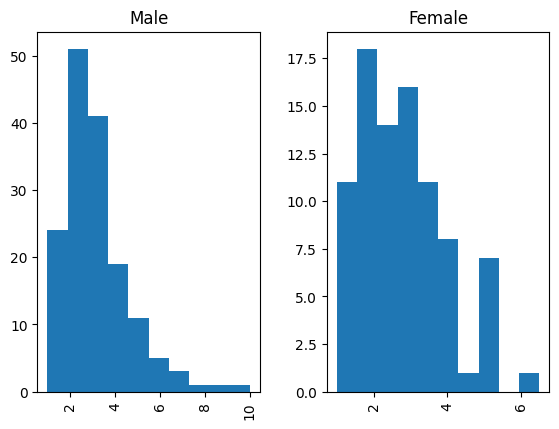

In [5]:
# Histogram plot
tips.hist(column="tip", by="sex")

<Axes: xlabel='total_bill', ylabel='tip'>

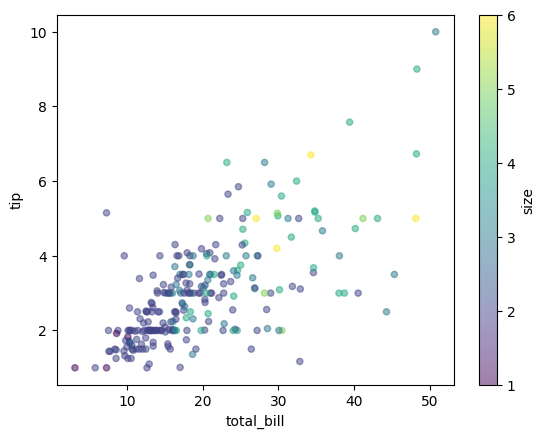

In [6]:
# Scatter plot
tips.plot.scatter(x="total_bill", y="tip", c='size', alpha=0.5, colormap='viridis')

## Part 2 - Preprocessing

In this part we need to get the data ready for machine learning models. Since there are no missing values, we are left with converting the categorical data to numerical data. After this, we need to split the data into training sets and testing sets.
 - Convert the categorical columns (smoker, sex, day, time) into numercal columns with the `.replace()` method. For the `day` column, you can split it into the weekend days, and the non-weekend days. (Hint: Remember to drop the old columns before proceeding)
 - Check out the correlation between the columns. Delete the column with the smallest correlation with `tip`.
 - Separate the dataset into a target column (`tip`) and feature columns, and then split them into training and testing sets.

In [7]:
# Checking the categorical values to convert them into numerical values
print(f"Sex values coiunts: {tips["sex"].value_counts()}\n")
print(f"Smoker values coiunts: {tips["smoker"].value_counts()}\n")
print(f"day values coiunts: {tips["day"].value_counts()}\n")
print(f"time values coiunts: {tips["time"].value_counts()}\n")

Sex values coiunts: sex
Male      157
Female     87
Name: count, dtype: int64

Smoker values coiunts: smoker
No     151
Yes     93
Name: count, dtype: int64

day values coiunts: day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

time values coiunts: time
Dinner    176
Lunch      68
Name: count, dtype: int64



In [8]:
# Converting the categories into numerical values
tips["is_male"] = tips["sex"].replace({"Male": 1, "Female": 0})
tips["smoker"] = tips["smoker"].replace({"No": 0, "Yes": 1})
tips["is_weekend"] = tips["day"].replace({"Thur": 0, "Fri": 0, "Sat": 0, "Sun": 1})
tips["is_dinner"] = tips["time"].replace({"Lunch": 0, "Dinner": 1})

/var/folders/3m/js66k40s0h7dlwq3dhmrr12m0000gq/T/ipykernel_69422/4091546244.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tips["is_male"] = tips["sex"].replace({"Male": 1, "Female": 0})
/var/folders/3m/js66k40s0h7dlwq3dhmrr12m0000gq/T/ipykernel_69422/4091546244.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  tips["is_male"] = tips["sex"].replace({"Male": 1, "Female": 0})
/var/folders/3m/js66k40s0h7dlwq3dhmrr12m0000gq/T/ipykernel_69422/4091546244.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a

In [9]:
# View the updated DataFrame
tips.head()

,total_bill,tip,sex,smoker,day,time,size,is_male,is_weekend,is_dinner
0,16.99,1.01,Female,0,Sun,Dinner,2,0,1,1
1,10.34,1.66,Male,0,Sun,Dinner,3,1,1,1
2,21.01,3.50,Male,0,Sun,Dinner,3,1,1,1
3,23.68,3.31,Male,0,Sun,Dinner,2,1,1,1
4,24.59,3.61,Female,0,Sun,Dinner,4,0,1,1


In [10]:
# Drop the old categorical columns
tips.drop(columns=["sex", "day", "time"], inplace=True)

In [11]:
# Check out the corrlation of the columns
tips.corr()

,total_bill,tip,smoker,size,is_male,is_weekend,is_dinner
total_bill,1.000000,0.675734,0.085721,0.598315,0.144877,0.122953,0.183118
tip,0.675734,1.000000,0.005929,0.489299,0.088862,0.125114,0.121629
smoker,0.085721,0.005929,1.000000,-0.133178,0.002816,-0.181624,0.054921
size,0.598315,0.489299,-0.133178,1.000000,0.086195,0.193054,0.103411
is_male,0.144877,0.088862,0.002816,0.086195,1.000000,0.168106,0.205231
is_weekend,0.122953,0.125114,-0.181624,0.193054,0.168106,1.000000,0.418071
is_dinner,0.183118,0.121629,0.054921,0.103411,0.205231,0.418071,1.000000


In [12]:
# Remove the smoker column
tips.drop(columns="smoker", inplace=True)

In [20]:
# Separate the features and the target (tip)
X = tips[["tip"]]
y = tips.drop(columns="tip")

In [21]:
# Import the train_test_split function
from sklearn.model_selection import train_test_split

In [27]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

## Part 3 - Machine Learning

Now we are at the last step. Train a regression machine learning model and check how well it does on the data. What is the error you get?

- (Pro) Put you machine learning model into a pipeline where you also scale the data.
- (Mega Pro) Compare two different machine learning models to see which one peforms the best.

In [28]:
# Relevant imports
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error

In [29]:
# Create linear regression model (or pipeline)
lin_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [30]:
# Fitting the model (or pipeline)
lin_reg.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('lin_reg', LinearRegression())])

In [31]:
# Find the absolute error of the linear regression model
y_pred = lin_reg.predict(X_test)
lin_reg_mae = mean_absolute_error(y_pred, y_test)
print(f"Linear Regression with Scaler MAE: {lin_reg_mae}")

Linear Regression with Scaler MAE: 1.3753708722171603


In [33]:
# Create polynomial regression model (or pipeline)
poly_pipe = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2)),
    ("scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [34]:
# Fitting the model (or pipeline)
poly_pipe.fit(X_train, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures()),
                ('scaler', StandardScaler()), ('lin_reg', LinearRegression())])

In [35]:
# Finding the absolute error of the polynomial regression model 
y_pred_poly = poly_pipe.predict(X_test)
poly_mae = mean_absolute_error(y_pred_poly, y_test)
print(f"Polynomial Regression with Scaler MAE: {poly_mae}")

Polynomial Regression with Scaler MAE: 1.3766251499148412


## Conclusion

- The dataset contains **244 records** with **no missing values**, as all columns have complete entries.
- Descriptive statistics show that:
  - The **average total bill** is approximately **19.79**.
  - The **average tip** is around **3.00**.
  - The **average group size** is about **2.57**.
- Exploratory data analysis reveals:
  - A **positive relationship between `total_bill` and `tip`**, indicating that higher bills usually result in higher tips.
  - Tip distributions vary slightly based on **gender**, as observed from histograms.
- Correlation analysis shows:
  - `tip` is most strongly correlated with **`total_bill` (≈ 0.68)** and **`size` (≈ 0.49)**.
  - The `smoker` variable has a **very weak correlation (≈ 0.01)** with `tip`, so it was removed from the model.
- Model evaluation results indicate:
  - **Linear Regression MAE ≈ 1.38**
  - **Polynomial Regression MAE ≈ 1.38**
- Both models perform almost identically, and **Polynomial Regression does not significantly improve prediction accuracy**.
- Therefore, **Linear Regression is preferred** due to its simplicity, interpretability, and similar performance.

### Overall Insight

This project demonstrates that **simple linear models can effectively predict restaurant tips** using basic features such as total bill and group size. Complex models are not always necessary when relationships in data are mostly linear.
